# IGRINS CA1 *shallow* facet shadowing

Here we make a schematic of the shallow facet shadowing, see notebooke #3 for the scarp facet shadowing.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format='retina'

### Fixed physical properties

In [2]:
sigma = 27.36 # micron

In [3]:
groove_top_width = 9.95 # micron

Here is a cartoon of the IGRINS CA-1 grating from [this slideshow](https://speakerdeck.com/gully/ideas-for-metrology-of-silicon-diffractive-optics?slide=45).

In [4]:
%%html
<img src="../IGRINS_CA1_schematic.png" width=300></img>

The angle $a$ is the fixed $70.53^\circ$ from the Si crystal planes, $b$ is $\arctan{3}$, and c is whatever is left over to add up to 180.

In [5]:
a_degrees = 70.53 # "Fixed" Si crystal plane angle

In [6]:
b_degrees = np.degrees(np.arctan(3)) # Blaze angle

In [7]:
c_degrees = 180 - a_degrees - b_degrees # Complement must add up to 180

In [8]:
a_radians, b_radians, c_radians = (np.radians(angle) for angle in 
                                   [a_degrees, b_degrees, c_degrees])

#### What are the lengths of line segments $A$, $B$, $C$?

$A$ is the groove spacing minus the groove top:

In [9]:
A_micron = sigma - groove_top_width

We now have a triangle with known Angle-Side-Angle or `ASA`.
Solve for line segments $B$ and $C$ with the [Law of Sines](https://en.wikipedia.org/wiki/Law_of_sines): 
$$\frac{\sin{\alpha}}{a} \,=\, \frac{\sin{\beta}}{b} \,=\, \frac{\sin{\gamma}}{c}$$

In [10]:
fixed_ratio = np.sin(a_radians) / A_micron

In [11]:
B_micron = np.sin(b_radians) / fixed_ratio
C_micron = np.sin(c_radians) / fixed_ratio

In [12]:
A_micron, B_micron, C_micron

(17.41, 17.518342623201463, 11.344621078105504)

## Determine the coordinates of the triangle vertices

The coordinates are needed for plotting purposes.  Define the `c` vertex at the origin.  The vectors will have coordinates $$\vec{a} = a_x \hat{i} + a_y \hat{j} = (a_x, a_y)$$

In [13]:
c_vertex = np.array([0.0, 0.0])
c_vertex.shape

(2,)

In [14]:
b_vertex = c_vertex + np.array([A_micron, 0.0])

The $a$ vertex has components derived from the angles and side lengths. **SOH-CAH-TOA**

$$\sin{c} = -a_y/B$$
$$\cos{c} = a_x/B$$

In [15]:
a_vertex = np.array([B_micron*np.cos(c_radians), -B_micron*np.sin(c_radians)])
a_vertex

array([ 13.82251582, -10.76245254])

Finally we will define another vector $d$ as the start of the groove top:

In [16]:
d_vertex = np.array([-groove_top_width, 0.0])

### Illustrate the beam

The beam comes in at a certain incidence angle and illuminates all of the groove top and some of the groove facet, dependening on the angle.

In [17]:
incidence_angle_degrees = -44.6
incidence_angle_radians = np.radians(incidence_angle_degrees)

Determine the coordinates of the beam.  The rays come in from infinity, but let's draw them has having a fixed length for illustration purposes.

In [18]:
far = 100.0

In [19]:
ray1_vertex = np.array([-far*np.sin(incidence_angle_radians), 
                                far*np.cos(incidence_angle_radians)])

Determine the coordinate at which the marginal ray is shadowed:

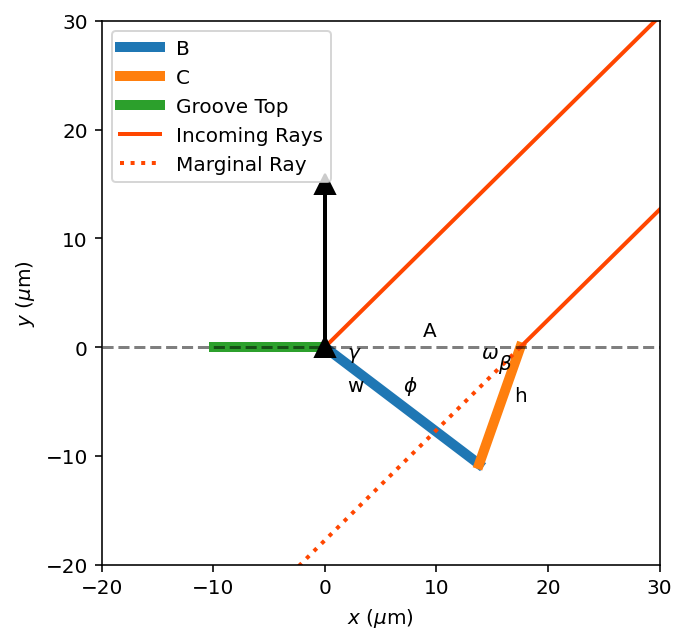

In [20]:
plt.figure(figsize=(5, 5))
plt.plot([c_vertex[0], a_vertex[0]], [c_vertex[1], a_vertex[1]], lw=5, label='B')
plt.plot([a_vertex[0], b_vertex[0]], [a_vertex[1], b_vertex[1]], lw=5, label='C')
plt.plot([c_vertex[0], d_vertex[0]], [c_vertex[1], d_vertex[1]], lw=5, label='Groove Top')

# Plot the incoming rays
plt.plot([c_vertex[0], ray1_vertex[0]], [c_vertex[1], ray1_vertex[1]], 
         color='#ff4600', lw=2, label='Incoming Rays')
plt.plot([c_vertex[0]+B_micron, ray1_vertex[0]+B_micron], [c_vertex[1], ray1_vertex[1]], 
         color='#ff4600', lw=2)
plt.plot([c_vertex[0]+B_micron, -ray1_vertex[0]+B_micron], [c_vertex[1], -ray1_vertex[1]], 
         color='#ff4600', lw=2, linestyle='dotted', label='Marginal Ray')

plt.text(B_micron/2, 1, 'A')
plt.text(b_vertex[0]-2, b_vertex[1]-2, r'$\beta$')
plt.text(2,-1, r'$\gamma$')
plt.text(17,-5, 'h')
plt.text(2,-4, 'w')
plt.text(+7,-4, r'$\phi$')
plt.text(+14,-1, r'$\omega$')


plt.plot([0.0, 0.0], [0.0, 15], linewidth=2, color='k', marker='^', markersize=10)

plt.axhline(0.0, linestyle='dashed', color='k', alpha=0.5)

plt.xlim(-20, 30)
plt.ylim(-20, 30)
plt.xlabel('$x$ ($\mu$m)');
plt.ylabel('$y$ ($\mu$m)')
plt.legend();

We have $\gamma$, and $\beta$, so we can get $\alpha$:

In [21]:
gamma_degrees = c_degrees

In [22]:
omega_degrees = 90 - np.abs(incidence_angle_degrees)
omega_radians = np.radians(omega_degrees)

In [23]:
phi_degrees = 180 - omega_degrees - gamma_degrees
phi_radians = np.radians(phi_degrees)

We want to find the length of the linesegment.  Let's use angle-side-angle `ASA`:

$$\frac{\sin{\phi}}{A} \,=\, \frac{\sin{\omega}}{w} \,=\, \frac{\sin{\gamma}}{\mathrm{undef}}$$

solve for $w$:

$$w \,=\, A \frac{\sin{\omega}}{\sin{\phi}}$$


In [24]:
w_micron = A_micron * np.sin(omega_radians)/np.sin(phi_radians)

In [25]:
w_micron

12.481488185199067

Yay! We did it!